# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/tuxiaochi/Desktop/jupyternb/we_data/train.csv')
df.head(10)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


Text(0, 0.5, 'No. of Clicks')

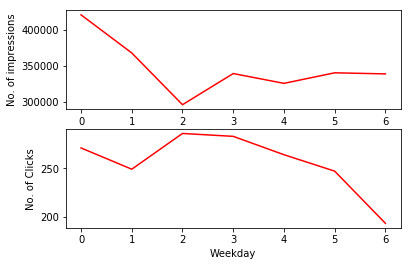

In [3]:
day_imps = []
day_clicks = []

df_click = df[df['click']==1]

for i in range(7):
    day_imps.append(len(df[df['weekday']==i]))
    day_clicks.append(len(df_click[df_click['weekday']==i]))

fig = plt.figure()

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(range(7), day_imps, '-r')
plt.xlabel('Weekday')
plt.ylabel('No. of impressions')

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(range(7), day_clicks, '-r')
plt.xlabel('Weekday')
plt.ylabel('No. of Clicks')


In [4]:
day = pd.DataFrame({'day_imps': day_imps,
                    'day_clicks': day_clicks})
day['day_CTR'] = day['day_clicks']/day['day_imps']
day

,day_imps,day_clicks,day_CTR
0,420955,271,0.000644
1,368164,249,0.000676
2,296438,286,0.000965
3,339627,283,0.000833
4,326018,264,0.000810
5,340642,247,0.000725
6,339137,193,0.000569


Text(0, 0.5, 'No. of clicks')

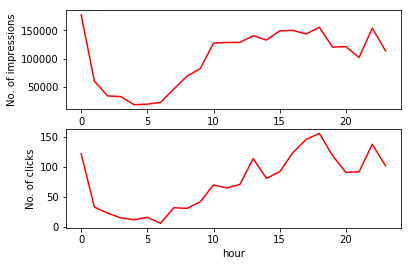

In [5]:
hour_imps = []
hour_clicks = []

for i in range(24):
    hour_imps.append(len(df[df['hour']==i]))
    hour_clicks.append(len(df_click[df_click['hour']==i]))

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(range(24), hour_imps, '-r')
plt.xlabel('hour')
plt.ylabel('No. of impressions')

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(range(24), hour_clicks, '-r')
plt.xlabel('hour')
plt.ylabel('No. of clicks')

In [6]:
hour = pd.DataFrame({'hour_imps': hour_imps,
                     'hour_clicks': hour_clicks})
hour['hour_CTR'] = hour['hour_clicks']/hour['hour_imps']
hour

,hour_imps,hour_clicks,hour_CTR
0,177163,122,0.000689
1,60331,33,0.000547
2,34361,23,0.000669
3,33126,15,0.000453
4,18874,12,0.000636
5,19867,16,0.000805
6,23047,6,0.000260
7,46490,32,0.000688
8,69197,31,0.000448
9,82399,42,0.000510


In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

adexchange      49829
domain         137135
url             86812
urlid         2430981
keypage        504990
usertag        497479
dtype: int64

In [8]:
num_imps = []
num_clicks = []
cost = []
CTR = []
avg_CPM = []
CPC = []

adv = df.advertiser.unique().tolist()

for i in adv:
    ad = df[df['advertiser']==i]
    num_imps.append(len(ad))
    num_clicks.append(sum(ad.click == 1))
    cost.append(sum(ad.payprice))
    CTR.append(sum(ad.click == 1)/len(ad.click))
    avg_CPM.append(sum(ad.payprice)*1000/len(ad))
    CPC.append(sum(ad.payprice)/sum(ad.click == 1))
    
stat_df = pd.DataFrame({'Advertiser': adv,
                        'Number of Impressions': num_imps,
                        'Number of Clicks': num_clicks,
                        'Cost': cost,
                        'CTR': CTR,
                        'Average_CPM': avg_CPM,
                        'Cost per Clic (CPC)': CPC})
stat_df

,Advertiser,Number of Impressions,Number of Clicks,Cost,CTR,Average_CPM,Cost per Clic (CPC)
0,3427,402806,272,30458711,0.000675,75616.328952,111980.555147
1,2821,211366,131,18828044,0.000620,89077.921709,143725.526718
2,1458,492353,385,33968736,0.000782,68992.645521,88230.483117
3,2259,133673,43,12428238,0.000322,92974.931362,289028.790698
4,3386,455041,320,34931823,0.000703,76766.319958,109161.946875
5,3358,264956,202,22447231,0.000762,84720.598892,111124.905941
6,3476,310835,187,23918779,0.000602,76950.082841,127907.909091
7,2261,110122,36,9873779,0.000327,89662.183760,274271.638889
8,2997,49829,217,3129267,0.004355,62800.116398,14420.585253
